In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
np.random.seed(123)
df=pd.read_csv('/content/Train_dataset1.csv')
df.head()

Stock Index    Index  ... P/B Ratio  Stock Price
0         AA1     NYSE  ...      9.20   156.987851
1         AA2     NYSE  ...      6.91   560.859622
2         AA3     NYSE  ...      6.09  1279.732874
3         AA4      BSE  ...      5.60  1121.787632
4         AA5  S&P 500  ...      9.46   382.962534

[5 rows x 15 columns]

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           7383 non-null   object 
 1   Index                 7383 non-null   object 
 2   Industry              7383 non-null   object 
 3   VWAP                  7345 non-null   float64
 4   General Index         7321 non-null   float64
 5   NAV                   7322 non-null   float64
 6   P/E Ratio             7149 non-null   float64
 7   Volumes Traded        7115 non-null   float64
 8   Inventory Turnover    6984 non-null   float64
 9   Covid Impact (Beta)   7007 non-null   float64
 10  Tracking Error        7312 non-null   float64
 11  Dollar Exchange Rate  7306 non-null   float64
 12  Put-Call Ratio        7298 non-null   float64
 13  P/B Ratio             7358 non-null   float64
 14  Stock Price           7383 non-null   float64
dtypes: float64(12), objec

In [76]:
df = df.drop(['Stock Index','Index','Industry'],axis=1)
df


VWAP  General Index    NAV  ...  Put-Call Ratio  P/B Ratio  Stock Price
0     700.29       12765.84  32.38  ...            0.61       9.20   156.987851
1     214.52       12765.84  33.25  ...             NaN       6.91   560.859622
2     943.42       12765.84  88.27  ...             NaN       6.09  1279.732874
3     828.13       38182.08  73.66  ...            1.11       5.60  1121.787632
4        NaN        3351.28  23.79  ...            1.07       9.46   382.962534
...      ...            ...    ...  ...             ...        ...          ...
7378  773.91       11270.15  40.28  ...            0.98        NaN   248.019321
7379   61.97       55722.00  79.56  ...            0.84        NaN   494.555631
7380  131.99       55722.00  26.16  ...            1.22        NaN   500.869063
7381  643.72        3351.28  29.24  ...            1.04        NaN   113.170686
7382  126.46        3351.28  23.30  ...            1.23        NaN   236.641085

[7383 rows x 12 columns]

In [77]:
print(df.isna().sum())

VWAP                     38
General Index            62
NAV                      61
P/E Ratio               234
Volumes Traded          268
Inventory Turnover      399
Covid Impact (Beta)     376
Tracking Error           71
Dollar Exchange Rate     77
Put-Call Ratio           85
P/B Ratio                25
Stock Price               0
dtype: int64


In [78]:
#replace null values with mean values of the respective columns

df['VWAP'].mean()
df['VWAP']=df['VWAP'].replace(np.NAN,df['VWAP'].mean())

df['General Index'].mean()
df['General Index']=df['General Index'].replace(np.NAN,df['General Index'].mean())

df['NAV'].mean()
df['NAV']=df['NAV'].replace(np.NAN,df['NAV'].mean())

df['P/E Ratio'].mean()
df['P/E Ratio']=df['P/E Ratio'].replace(np.NAN,df['P/E Ratio'].mean())

df['Volumes Traded'].mean()
df['Volumes Traded']=df['Volumes Traded'].replace(np.NAN,df['Volumes Traded'].mean())

df['Inventory Turnover'].mean()
df['Inventory Turnover']=df['Inventory Turnover'].replace(np.NAN,df['Inventory Turnover'].mean())

df['Covid Impact (Beta)'].mean()
df['Covid Impact (Beta)']=df['Covid Impact (Beta)'].replace(np.NAN,df['Covid Impact (Beta)'].mean())

df['Tracking Error'].mean()
df['Tracking Error']=df['Tracking Error'].replace(np.NAN,df['Tracking Error'].mean())

df['Dollar Exchange Rate'].mean()
df['Dollar Exchange Rate']=df['Dollar Exchange Rate'].replace(np.NAN,df['Dollar Exchange Rate'].mean())

df['Put-Call Ratio'].mean()
df['Put-Call Ratio']=df['Put-Call Ratio'].replace(np.NAN,df['Put-Call Ratio'].mean())

df['P/B Ratio'].mean()
df['P/B Ratio']=df['P/B Ratio'].replace(np.NAN,df['P/B Ratio'].mean())

In [79]:
print(df.isna().sum())

VWAP                    0
General Index           0
NAV                     0
P/E Ratio               0
Volumes Traded          0
Inventory Turnover      0
Covid Impact (Beta)     0
Tracking Error          0
Dollar Exchange Rate    0
Put-Call Ratio          0
P/B Ratio               0
Stock Price             0
dtype: int64


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   VWAP                  7383 non-null   float64
 1   General Index         7383 non-null   float64
 2   NAV                   7383 non-null   float64
 3   P/E Ratio             7383 non-null   float64
 4   Volumes Traded        7383 non-null   float64
 5   Inventory Turnover    7383 non-null   float64
 6   Covid Impact (Beta)   7383 non-null   float64
 7   Tracking Error        7383 non-null   float64
 8   Dollar Exchange Rate  7383 non-null   float64
 9   Put-Call Ratio        7383 non-null   float64
 10  P/B Ratio             7383 non-null   float64
 11  Stock Price           7383 non-null   float64
dtypes: float64(12)
memory usage: 692.3 KB


In [81]:
df['VWAP']=(df['VWAP']-df['VWAP'].mean())/df['VWAP'].std()
df['General Index']=(df['General Index']-df['General Index'].mean())/df['General Index'].std()
df['NAV']=(df['NAV']-df['NAV'].mean())/df['NAV'].std()
df['P/E Ratio']=(df['P/E Ratio']-df['P/E Ratio'].mean())/df['P/E Ratio'].std()
df['Volumes Traded']=(df['Volumes Traded']-df['Volumes Traded'].mean())/df['Volumes Traded'].std()
df['Inventory Turnover']=(df['Inventory Turnover']-df['Inventory Turnover'].mean())/df['Inventory Turnover'].std()
df['Covid Impact (Beta)']=(df['Covid Impact (Beta)']-df['Covid Impact (Beta)'].mean())/df['Covid Impact (Beta)'].std()
df['Tracking Error']=(df['Tracking Error']-df['Tracking Error'].mean())/df['Tracking Error'].std()
df['Dollar Exchange Rate']=(df['Dollar Exchange Rate']-df['Dollar Exchange Rate'].mean())/df['Dollar Exchange Rate'].std()
df['Put-Call Ratio']=(df['Put-Call Ratio']-df['Put-Call Ratio'].mean())/df['Put-Call Ratio'].std()
df['P/B Ratio']=(df['P/B Ratio']-df['P/B Ratio'].mean())/df['P/B Ratio'].std()
df

VWAP  General Index  ...     P/B Ratio  Stock Price
0     7.713617e-01      -0.586702  ...  1.609020e+00   156.987851
1    -9.787605e-01      -0.586702  ...  7.323928e-01   560.859622
2     1.647306e+00      -0.586702  ...  4.184913e-01  1279.732874
3     1.231941e+00       0.715380  ...  2.309160e-01  1121.787632
4     6.143829e-16      -1.069013  ...  1.708550e+00   382.962534
...            ...            ...  ...           ...          ...
7378  1.036598e+00      -0.663327  ... -1.020002e-15   248.019321
7379 -1.528365e+00       1.613957  ... -1.020002e-15   494.555631
7380 -1.276098e+00       1.613957  ... -1.020002e-15   500.869063
7381  5.675525e-01      -1.069013  ... -1.020002e-15   113.170686
7382 -1.296021e+00      -1.069013  ... -1.020002e-15   236.641085

[7383 rows x 12 columns]

In [82]:
df.columns

Index(['VWAP', 'General Index', 'NAV', 'P/E Ratio', 'Volumes Traded',
       'Inventory Turnover', 'Covid Impact (Beta)', 'Tracking Error',
       'Dollar Exchange Rate', 'Put-Call Ratio', 'P/B Ratio', 'Stock Price'],
      dtype='object')

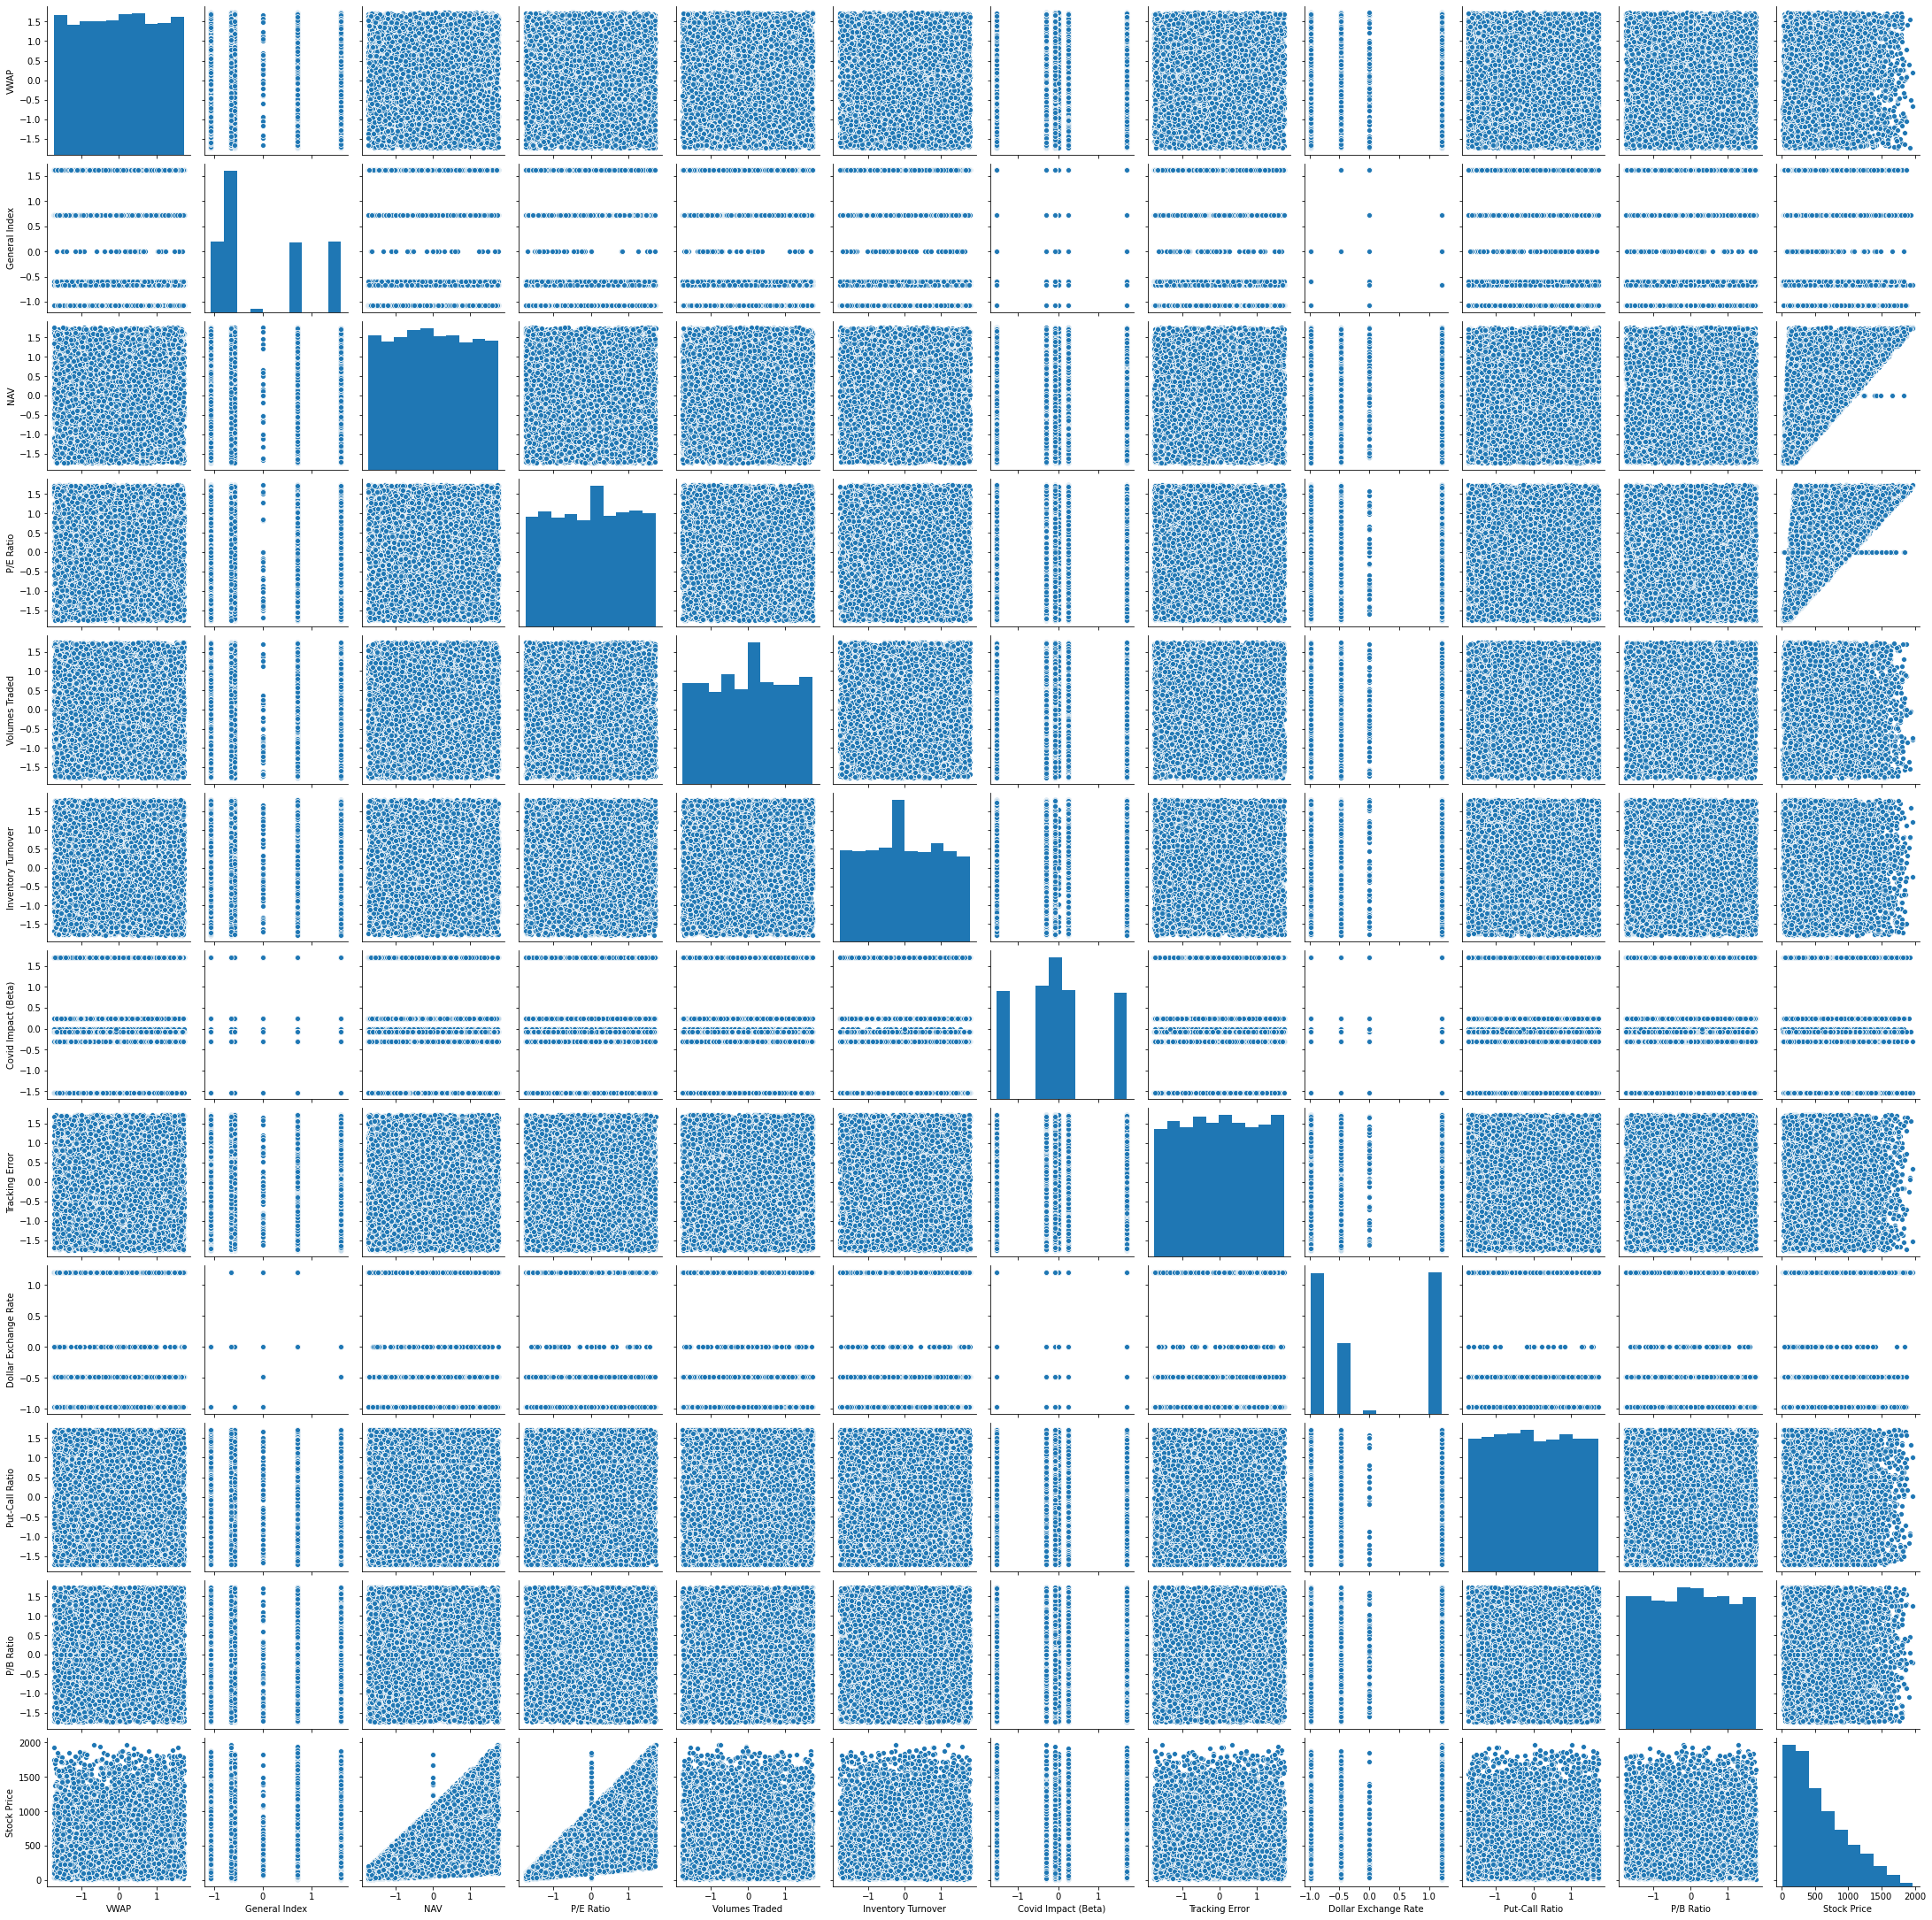

In [83]:
sns.pairplot(df[['VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price']])

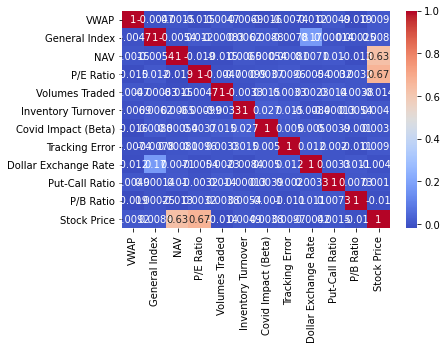

In [84]:
correlation=df.corr()
sns.heatmap(correlation,cmap='coolwarm',annot=True,fmt='.2g')

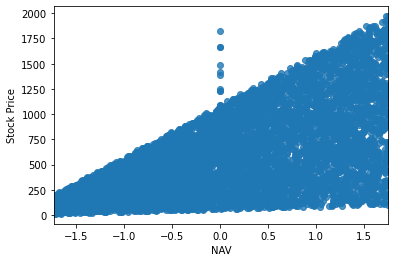

In [85]:
sns.regplot(x='NAV',y='Stock Price',data=df)

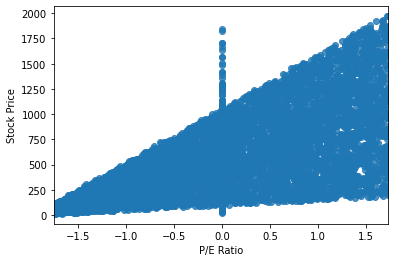

In [86]:
sns.regplot(x='P/E Ratio',y='Stock Price',data=df)

In [87]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['NAV'], df['Stock Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6300537167876548  with a P-value of P =  0.0


In [88]:
pearson_coef, p_value = stats.pearsonr(df['P/E Ratio'], df['Stock Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6716077158706905  with a P-value of P =  0.0


The R-square is:  0.8639993103386487
The mean square error of price and predicted value is:  24434.428918546422


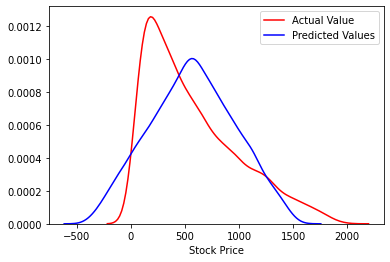

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lm = LinearRegression()

X = df[['NAV','P/E Ratio']]
Y = df['Stock Price']

lm.fit(X,Y)

Yhat=lm.predict(X)

print('The R-square is: ', lm.score(X, Y))
mse = mean_squared_error(df['Stock Price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)


ax1 = sns.distplot(df['Stock Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

The R-square is:  0.9904203394538088
The mean square error of price and predicted value is:  1721.1202036002137


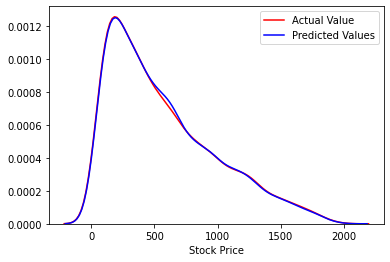

In [116]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error



X = df[['NAV','P/E Ratio']]
Y = df['Stock Price']
  
Rf = RandomForestRegressor(n_estimators = 100, random_state = 0)

Rf.fit(X,Y)

Yhat=Rf.predict(X)

print('The R-square is: ', Rf.score(X, Y))
mse = mean_squared_error(df['Stock Price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)


ax1 = sns.distplot(df['Stock Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

In [99]:
tf=pd.read_csv('/content/test.csv')
tf.head()

Stock Index    Index  ... Put-Call Ratio  P/B Ratio
0      AC3235      NSE  ...           0.80       4.66
1      AC3236      JSE  ...           0.86       6.11
2      AC3237  S&P 500  ...           0.93       4.99
3      AC3238      NSE  ...           1.09       1.26
4      AC3239     NYSE  ...            NaN       6.18

[5 rows x 14 columns]

In [100]:
tf = tf.drop(['Stock Index','Index','Industry'],axis=1)
tf


VWAP  General Index  ...  Put-Call Ratio  P/B Ratio
0      53.30       11270.15  ...            0.80       4.66
1     749.34       55722.00  ...            0.86       6.11
2     567.75        3351.28  ...            0.93       4.99
3     646.78       11270.15  ...            1.09       1.26
4     380.33       12765.84  ...             NaN       6.18
...      ...            ...  ...             ...        ...
3326  121.58       11270.15  ...            0.86       7.87
3327  692.25       38182.08  ...            0.64       0.95
3328  911.37       11270.15  ...            0.67       7.54
3329  479.38       38182.08  ...            0.79       4.01
3330  431.43       12765.84  ...            0.74       4.98

[3331 rows x 11 columns]

In [101]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3331 entries, 0 to 3330
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   VWAP                  3319 non-null   float64
 1   General Index         3060 non-null   float64
 2   NAV                   3056 non-null   float64
 3   P/E Ratio             3039 non-null   float64
 4   Volumes Traded        3283 non-null   float64
 5   Inventory Turnover    3301 non-null   float64
 6   Covid Impact (Beta)   3300 non-null   float64
 7   Tracking Error        3205 non-null   float64
 8   Dollar Exchange Rate  3188 non-null   float64
 9   Put-Call Ratio        2902 non-null   float64
 10  P/B Ratio             3193 non-null   float64
dtypes: float64(11)
memory usage: 286.4 KB


In [102]:
tf['VWAP'].mean()
tf['VWAP']=tf['VWAP'].replace(np.NAN,tf['VWAP'].mean())

tf['General Index'].mean()
tf['General Index']=tf['General Index'].replace(np.NAN,tf['General Index'].mean())

tf['NAV'].mean()
tf['NAV']=tf['NAV'].replace(np.NAN,tf['NAV'].mean())

tf['P/E Ratio'].mean()
tf['P/E Ratio']=tf['P/E Ratio'].replace(np.NAN,tf['P/E Ratio'].mean())

tf['Volumes Traded'].mean()
tf['Volumes Traded']=tf['Volumes Traded'].replace(np.NAN,tf['Volumes Traded'].mean())

tf['Inventory Turnover'].mean()
tf['Inventory Turnover']=tf['Inventory Turnover'].replace(np.NAN,tf['Inventory Turnover'].mean())

tf['Covid Impact (Beta)'].mean()
tf['Covid Impact (Beta)']=tf['Covid Impact (Beta)'].replace(np.NAN,tf['Covid Impact (Beta)'].mean())

tf['Tracking Error'].mean()
tf['Tracking Error']=tf['Tracking Error'].replace(np.NAN,tf['Tracking Error'].mean())

tf['Dollar Exchange Rate'].mean()
tf['Dollar Exchange Rate']=tf['Dollar Exchange Rate'].replace(np.NAN,tf['Dollar Exchange Rate'].mean())

tf['Put-Call Ratio'].mean()
tf['Put-Call Ratio']=tf['Put-Call Ratio'].replace(np.NAN,tf['Put-Call Ratio'].mean())

tf['P/B Ratio'].mean()
tf['P/B Ratio']=tf['P/B Ratio'].replace(np.NAN,tf['P/B Ratio'].mean())





In [103]:
print(tf.isna().sum())

VWAP                    0
General Index           0
NAV                     0
P/E Ratio               0
Volumes Traded          0
Inventory Turnover      0
Covid Impact (Beta)     0
Tracking Error          0
Dollar Exchange Rate    0
Put-Call Ratio          0
P/B Ratio               0
dtype: int64


In [104]:
tf['VWAP']=(tf['VWAP']-tf['VWAP'].mean())/tf['VWAP'].std()
tf['General Index']=(tf['General Index']-tf['General Index'].mean())/tf['General Index'].std()
tf['NAV']=(tf['NAV']-tf['NAV'].mean())/tf['NAV'].std()
tf['P/E Ratio']=(tf['P/E Ratio']-tf['P/E Ratio'].mean())/tf['P/E Ratio'].std()
tf['Volumes Traded']=(tf['Volumes Traded']-tf['Volumes Traded'].mean())/tf['Volumes Traded'].std()
tf['Inventory Turnover']=(tf['Inventory Turnover']-tf['Inventory Turnover'].mean())/tf['Inventory Turnover'].std()
tf['Covid Impact (Beta)']=(tf['Covid Impact (Beta)']-tf['Covid Impact (Beta)'].mean())/tf['Covid Impact (Beta)'].std()
tf['Tracking Error']=(tf['Tracking Error']-tf['Tracking Error'].mean())/tf['Tracking Error'].std()
tf['Dollar Exchange Rate']=(tf['Dollar Exchange Rate']-tf['Dollar Exchange Rate'].mean())/tf['Dollar Exchange Rate'].std()
tf['Put-Call Ratio']=(tf['Put-Call Ratio']-tf['Put-Call Ratio'].mean())/tf['Put-Call Ratio'].std()
tf['P/B Ratio']=(tf['P/B Ratio']-tf['P/B Ratio'].mean())/tf['P/B Ratio'].std()
tf



VWAP  General Index  ...  Put-Call Ratio  P/B Ratio
0    -1.548730      -0.725554  ...   -7.384524e-01  -0.133655
1     0.927829       1.606622  ...   -4.193019e-01   0.432114
2     0.281719      -1.141019  ...   -4.695976e-02  -0.004894
3     0.562913      -0.725554  ...    8.041081e-01  -1.460287
4    -0.385135      -0.647082  ...   -1.240149e-14   0.459427
...        ...            ...  ...             ...        ...
3326 -1.305785      -0.725554  ...   -4.193019e-01   1.118841
3327  0.724698       0.686386  ...   -1.589520e+00  -1.581245
3328  1.504343      -0.725554  ...   -1.429945e+00   0.990080
3329 -0.032708       0.686386  ...   -7.916441e-01  -0.387276
3330 -0.203317      -0.647082  ...   -1.057603e+00  -0.008796

[3331 rows x 11 columns]

In [117]:
Xt=tf[['NAV','P/E Ratio']]

Yhat=Rf.predict(Xt)


In [118]:
print(Yhat)


[ 838.7262948   232.54527617 1631.97861521 ...  627.20827568  345.7551823
 1360.56788103]


In [133]:
ttf=pd.read_csv('/content/test.csv')
  
# intialise data of lists. 
data = {'Stock Index':ttf['Stock Index'],'Stock Price':Yhat} 
  
# Create DataFrame 
dtf = pd.DataFrame(data) 
  
# Print the output. 
print(dtf) 

dtf.to_csv('Result1.csv')

     Stock Index  Stock Price
0         AC3235   838.726295
1         AC3236   232.545276
2         AC3237  1631.978615
3         AC3238   918.080743
4         AC3239   261.776915
...          ...          ...
3326      AD2734   135.631662
3327      AD2735   627.208276
3328      AD2736   627.208276
3329      AD2737   345.755182
3330      AD2738  1360.567881

[3331 rows x 2 columns]


Empty DataFrame
Columns: []
Index: []